In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings(action='ignore')
# import nltk
#nltk.download('all') # 처음 실행 시 주석을 제거하고 실행해주세요!

In [2]:
from tqdm import tqdm


In [3]:
df = pd.read_excel('news_label.xlsx', engine='openpyxl')

In [4]:
df['label'] = df['label'].astype(int) 
df

,dates,titles,contents,label,근거
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//,[\n마스카라까지 지우는 세정비누\n\n\n\n 피부에 자극을 주지 않고 각종 화장...,1,NaN
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",[\n기사내용 요약매장은 늘고 점포당 매출은 매월 줄고 있어코로나19로 마트 대신 ...,1,편의점과 제휴
2,2021.10.08,[株머니 매니저의 HOT종목]//,[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 주력 ...,1,성장언급
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//",[\n별도 물류센터 없이 동네마트 활용…中 알리바바의 슈퍼마켓 '허만셴셩' 벤치마크...,1,NaN
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",[\n\n\n\n\n/사진=알리익스프레스중국 최대 규모의 해외직구 쇼핑몰에서도 네이...,1,네이버 파이낸셜(네이버페이)와 제휴
...,...,...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//",[\n심사 승인 났는데 IPO 감감무소식골프존카운티는 내년으로 연기컬리도 오아시스 ...,0,NaN
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",[\n\t\t\t서울먹거리창업센터는 서울시가 국내 최초로 설립한 농식품 분야 특화 ...,1,NaN
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//",[\n■국감 오르는 유통업 새 먹거리e커머스 맞서 경쟁력 강화 위해쿠팡이츠마트 등 ...,0,NaN
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//,"[\n이커머스 IPO 대전, 흑자 기업 오아시스 연내 목표컬리, 증시 부진에 예상 ...",0,NaN


<AxesSubplot:>

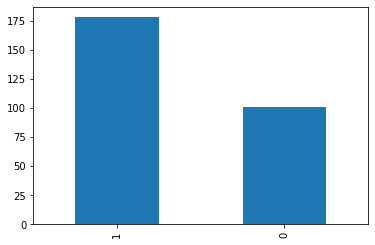

In [5]:
df['label'].value_counts().plot(kind='bar')

In [6]:
df['label'].value_counts()

1    178
0    101
Name: label, dtype: int64

In [7]:
df = df.rename(columns={'dates':'date', 'titles':'title','contents':'content'})
df['content'] = df['title'] + df['content']

In [8]:
df = df.drop(columns=['근거', 'title'])

In [9]:
train = df[:167]
# train['label'] = train['label'].astype(int)
train

,date,content,label
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,1
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",1
2,2021.10.08,[株머니 매니저의 HOT종목]//[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성...,1
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//[\...",1
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",1
...,...,...,...
162,2022.04.22,"[NH투자증권, SK에코플랜트 주관사 선정… IPO 실적 호조]//[우리생협, 오아...",0
163,2022.04.25,[“500억 투자했는데”... 홍정국의 아픈 손가락 ‘헬로네이처’ 매각 적신호]//...,1
164,2022.04.26,"[오아시스마켓 ""오프라인 매장 간판서 '생협' 제외""]//[[고고IPO] ‘업계 4...",1
165,2022.04.27,[[마켓인]프롭테크하면 무조건 뜬다?…투자유치 '부익부 빈익빈']//[IPO 앞둔 ...,0


In [10]:
# test set
test = df[167:]
test

,date,content,label
167,2022.04.29,"[공정위, 새벽배송업체 오아시스 ‘생협 간판’ 사용에 제동]//[""무조건 창업 한번...",0
168,2022.04.30,[코로나 엔데믹 전환에 배송전쟁 판도 변화…점유율 경쟁 보다 ‘수익성’]//[\n롯...,1
169,2022.05.02,[창업자 188명 '지상 IR' 날개…K-스타트업 등용문 '우뚝']//[오아시스마켓...,1
170,2022.05.03,"[[엔데믹, 오다]이커머스 '옥석 가리기' 본격 시동]//[우여곡절 끝에 IPO 첫...",0
171,2022.05.04,[9조 원 규모 새벽배송 누가 살아남을까? 돈의 전쟁이 시작됐다!]//[\n\t\t...,0
...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//[\n심사 승인 났는...",0
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",1
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//[\n■국감 오르...",0
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//[\n이커머스 ...,0


### 학습/검증셋 분리

In [11]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train)
train.reset_index(inplace=True) # 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화해주었습니다.
val.reset_index(inplace=True)

In [12]:
### train.set_index('date')

train = train.drop(columns = ['index'])
train

,date,content,label
0,2021.12.26,[[아듀 2021]코로나發 스타트업 고성장…두나무·직방·컬리·당근 '新유니콘']//...,1
1,2021.12.18,"[아마존이 백화점 오픈?…e커머스, 왜 오프라인 시장도 노리나]//[\n\t\t\t...",1
2,2021.12.29,[대어 줄상장·유니콘 등판… 내년 IPO ‘30조 시장’ 열리나]//['상반기 상장...,1
3,2021.11.03,"[상장 서두르는 새벽배송 업계의 속내는 [한경엣지]]//[뜨거워지는 장외시장, 증...",1
4,2022.03.18,[[시그널] 대상 임세령·임상민 자매 초록마을 매각 수혜 '독점']//[[마켓인사이...,1
...,...,...,...
120,2022.04.28,"[새벽배송 '헬로네이처', CU와 시너지 못낸 이유는?]//[디지털라이프 5~50%...",0
121,2022.03.31,[마켓컬리 IPO 본격화…오아시스마켓·SSG닷컴에 쏠린 눈]//[유통 대장주 노리는...,1
122,2022.03.21,"[오아시스마켓, 지난해 매출 3570억 달성…전년 대비 50%↑]//[오아시스마켓,...",1
123,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,1


In [13]:
val

,index,date,content,label
0,89,2022.01.21,[[CEO풍향계] '최대 위기' 정몽규…'속옷 외길' 한영대]//[오아시스+부릉 ‘...,0
1,47,2021.12.05,[내년 IPO 대어는? LG에너지솔루션·카카오엔터 등 출격 대기]//[\n[성공확률...,1
2,95,2022.01.27,"[지어소프트, 150억원 유상증자...2차전지사업에 투입]//[‘중대재해 화약고’ ...",1
3,12,2021.10.25,[[ET] 일주일 앞으로 다가온 ‘위드 코로나’…유통주가 대세?]//[비대면 시대에...,1
4,106,2022.02.07,"[[삼정KPMG CFO Lounge] 이커머스의 키(Key) 체인저, 온라인 식품 ...",1
5,94,2022.01.26,[유통주 추풍낙엽에...상장 앞둔 SSG닷컴·컬리·오아시스 ‘난감’]//[플레이어로...,0
6,87,2022.01.19,"[신선식품 플랫폼 업계, '자체페이' 내세워 경쟁력 차별화]//['10조 도전' 기...",1
7,38,2021.11.25,[[시그널] ‘IPO 시간 앞당기나' 오아시스···3~4월 예심 청구 기대]//[\...,1
8,137,2022.03.22,"[오아시스마켓, 지난해 매출 3570억원 '역대 최대']//[MSC, 배송업체와 손...",1
9,53,2021.12.11,[2021 이커머스 업계 합종연횡…새벽배송 기업 ‘상장 앞으로']//[\n[2021...,1


### 데이터 정제하기

In [14]:
# 문자 외의 것들 제거
train['content'] = train['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
train['content'] = train['content'].str.replace(' +',' ') 
train

,date,content,label
0,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,1
1,2021.12.18,아마존이 백화점 오픈 e커머스 왜 오프라인 시장도 노리나 편집자주 똑똑한 소비자 ...,1
2,2021.12.29,대어 줄상장 유니콘 등판 내년 IPO 30조 시장 열리나 상반기 상장 마켓컬리 상...,1
3,2021.11.03,상장 서두르는 새벽배송 업계의 속내는 한경엣지 뜨거워지는 장외시장 증권업계도 후끈...,1
4,2022.03.18,시그널 대상 임세령 임상민 자매 초록마을 매각 수혜 독점 마켓인사이트 식음료 투자...,1
...,...,...,...
120,2022.04.28,새벽배송 헬로네이처 CU와 시너지 못낸 이유는 디지털라이프 5 50 캐시백 혜택 ...,0
121,2022.03.31,마켓컬리 IPO 본격화 오아시스마켓 SSG닷컴에 쏠린 눈 유통 대장주 노리는 SS...,1
122,2022.03.21,오아시스마켓 지난해 매출 3570억 달성 전년 대비 50 오아시스마켓 작년도 흑자...,1
123,2021.10.05,톡톡 이상품 한빛코리아 다지워 네이처 클렌징 솝 마스카라까지 지우는 세정비누 피부...,1


<AxesSubplot:>

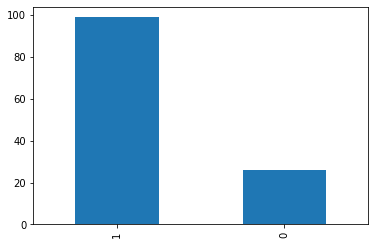

In [15]:
train['label'].value_counts().plot(kind='bar')

### 토큰화

In [16]:
from konlpy.tag import Okt

In [17]:
okt = Okt()

In [18]:
tokenized = [] # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in train['content']: # 전처리된 리뷰들을 하나씩 꺼내옵니다
    tokens = okt.morphs(sentence, stem = True) # 형태소 분석 (stem = True로 설정해 어간 추출을 해주었습니다)
    tokenize = " ".join(tokens) # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    tokenized.append(tokenize) # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가해줍니다
train["tokenized_stem"] = pd.DataFrame(tokenized) # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem
0,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,1,아듀 2021 코로나 스타트업 고 성장 두 나무 직방 컬리 당근 유니콘 올해 국내 ...
1,2021.12.18,아마존이 백화점 오픈 e커머스 왜 오프라인 시장도 노리나 편집자주 똑똑한 소비자 ...,1,아마존 이 백화점 오픈 e 커머스 왜 오프라인 시장 도 노리 나 편집 자주 똑똑하다...
2,2021.12.29,대어 줄상장 유니콘 등판 내년 IPO 30조 시장 열리나 상반기 상장 마켓컬리 상...,1,대다 줄 상장 유니콘 등판 내년 IPO 30조 시장 열 리나 상반기 상장 마켓 컬리...
3,2021.11.03,상장 서두르는 새벽배송 업계의 속내는 한경엣지 뜨거워지는 장외시장 증권업계도 후끈...,1,상장 서두르다 새벽 배송 업계 의 속 내 는 한 경 엣지 뜨겁다 장외 시장 증권 업...
4,2022.03.18,시그널 대상 임세령 임상민 자매 초록마을 매각 수혜 독점 마켓인사이트 식음료 투자...,1,시그널 대상 임세령 임 상민 자매 초록 마을 매각 수혜 독점 마켓 인사이트 식 음료...


In [19]:
train['label'] = train['label'].astype(int)
train

,date,content,label,tokenized_stem
0,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,1,아듀 2021 코로나 스타트업 고 성장 두 나무 직방 컬리 당근 유니콘 올해 국내 ...
1,2021.12.18,아마존이 백화점 오픈 e커머스 왜 오프라인 시장도 노리나 편집자주 똑똑한 소비자 ...,1,아마존 이 백화점 오픈 e 커머스 왜 오프라인 시장 도 노리 나 편집 자주 똑똑하다...
2,2021.12.29,대어 줄상장 유니콘 등판 내년 IPO 30조 시장 열리나 상반기 상장 마켓컬리 상...,1,대다 줄 상장 유니콘 등판 내년 IPO 30조 시장 열 리나 상반기 상장 마켓 컬리...
3,2021.11.03,상장 서두르는 새벽배송 업계의 속내는 한경엣지 뜨거워지는 장외시장 증권업계도 후끈...,1,상장 서두르다 새벽 배송 업계 의 속 내 는 한 경 엣지 뜨겁다 장외 시장 증권 업...
4,2022.03.18,시그널 대상 임세령 임상민 자매 초록마을 매각 수혜 독점 마켓인사이트 식음료 투자...,1,시그널 대상 임세령 임 상민 자매 초록 마을 매각 수혜 독점 마켓 인사이트 식 음료...
...,...,...,...,...
120,2022.04.28,새벽배송 헬로네이처 CU와 시너지 못낸 이유는 디지털라이프 5 50 캐시백 혜택 ...,0,새벽 배송 헬로 네이처 CU 오다 시너지 못 내다 이유 는 디지털 라이프 5 50 ...
121,2022.03.31,마켓컬리 IPO 본격화 오아시스마켓 SSG닷컴에 쏠린 눈 유통 대장주 노리는 SS...,1,마켓 컬리 IPO 본격 화 오아시스 마켓 SSG 닷 컴 에 쏠리다 눈 유통 대 장주...
122,2022.03.21,오아시스마켓 지난해 매출 3570억 달성 전년 대비 50 오아시스마켓 작년도 흑자...,1,오아시스 마켓 지난해 매출 3570억 달성 전 년 대비 50 오아시스 마켓 작년 도...
123,2021.10.05,톡톡 이상품 한빛코리아 다지워 네이처 클렌징 솝 마스카라까지 지우는 세정비누 피부...,1,톡톡 이 상품 한빛 코리아 다지다 네이처 클렌징 솝 마스카라 까지 지우다 세 정 비...


### 품사 태깅 / 불용어 처리와 비슷한 느낌

In [20]:
main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
for sentence in train['content']: # 리뷰들을 하나씩 가져옵니다
    pos = okt.pos(sentence) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
    main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
train["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem,main_pos
0,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,1,아듀 2021 코로나 스타트업 고 성장 두 나무 직방 컬리 당근 유니콘 올해 국내 ...,아듀 코로나 스타트업 성장 나무 직방 컬리 당근 유니콘 올해 국내 스타트업 투자 유...
1,2021.12.18,아마존이 백화점 오픈 e커머스 왜 오프라인 시장도 노리나 편집자주 똑똑한 소비자 ...,1,아마존 이 백화점 오픈 e 커머스 왜 오프라인 시장 도 노리 나 편집 자주 똑똑하다...,아마존 백화점 오픈 커머스 왜 오프라인 시장 노리 편집 자주 똑똑한 소비자 리포트 ...
2,2021.12.29,대어 줄상장 유니콘 등판 내년 IPO 30조 시장 열리나 상반기 상장 마켓컬리 상...,1,대다 줄 상장 유니콘 등판 내년 IPO 30조 시장 열 리나 상반기 상장 마켓 컬리...,대어 줄 상장 유니콘 등판 내년 시장 리나 상반기 상장 마켓 컬리 상장 예비 심사 ...
3,2021.11.03,상장 서두르는 새벽배송 업계의 속내는 한경엣지 뜨거워지는 장외시장 증권업계도 후끈...,1,상장 서두르다 새벽 배송 업계 의 속 내 는 한 경 엣지 뜨겁다 장외 시장 증권 업...,상장 서두르는 새벽 배송 업계 내 엣지 뜨거워지는 장외 시장 증권 업계 후끈 새벽 ...
4,2022.03.18,시그널 대상 임세령 임상민 자매 초록마을 매각 수혜 독점 마켓인사이트 식음료 투자...,1,시그널 대상 임세령 임 상민 자매 초록 마을 매각 수혜 독점 마켓 인사이트 식 음료...,시그널 대상 임세령 임 상민 자매 초록 마을 매각 수혜 독점 마켓 인사이트 식 음료...


In [21]:
train

,date,content,label,tokenized_stem,main_pos
0,2021.12.26,아듀 2021 코로나 스타트업 고성장 두나무 직방 컬리 당근 유니콘 올해 국내 스...,1,아듀 2021 코로나 스타트업 고 성장 두 나무 직방 컬리 당근 유니콘 올해 국내 ...,아듀 코로나 스타트업 성장 나무 직방 컬리 당근 유니콘 올해 국내 스타트업 투자 유...
1,2021.12.18,아마존이 백화점 오픈 e커머스 왜 오프라인 시장도 노리나 편집자주 똑똑한 소비자 ...,1,아마존 이 백화점 오픈 e 커머스 왜 오프라인 시장 도 노리 나 편집 자주 똑똑하다...,아마존 백화점 오픈 커머스 왜 오프라인 시장 노리 편집 자주 똑똑한 소비자 리포트 ...
2,2021.12.29,대어 줄상장 유니콘 등판 내년 IPO 30조 시장 열리나 상반기 상장 마켓컬리 상...,1,대다 줄 상장 유니콘 등판 내년 IPO 30조 시장 열 리나 상반기 상장 마켓 컬리...,대어 줄 상장 유니콘 등판 내년 시장 리나 상반기 상장 마켓 컬리 상장 예비 심사 ...
3,2021.11.03,상장 서두르는 새벽배송 업계의 속내는 한경엣지 뜨거워지는 장외시장 증권업계도 후끈...,1,상장 서두르다 새벽 배송 업계 의 속 내 는 한 경 엣지 뜨겁다 장외 시장 증권 업...,상장 서두르는 새벽 배송 업계 내 엣지 뜨거워지는 장외 시장 증권 업계 후끈 새벽 ...
4,2022.03.18,시그널 대상 임세령 임상민 자매 초록마을 매각 수혜 독점 마켓인사이트 식음료 투자...,1,시그널 대상 임세령 임 상민 자매 초록 마을 매각 수혜 독점 마켓 인사이트 식 음료...,시그널 대상 임세령 임 상민 자매 초록 마을 매각 수혜 독점 마켓 인사이트 식 음료...
...,...,...,...,...,...
120,2022.04.28,새벽배송 헬로네이처 CU와 시너지 못낸 이유는 디지털라이프 5 50 캐시백 혜택 ...,0,새벽 배송 헬로 네이처 CU 오다 시너지 못 내다 이유 는 디지털 라이프 5 50 ...,새벽 배송 헬로 네이처 와 시너지 낸 이유 디지털 라이프 캐시 혜택 미리 보는 이데...
121,2022.03.31,마켓컬리 IPO 본격화 오아시스마켓 SSG닷컴에 쏠린 눈 유통 대장주 노리는 SS...,1,마켓 컬리 IPO 본격 화 오아시스 마켓 SSG 닷 컴 에 쏠리다 눈 유통 대 장주...,마켓 컬리 본격 오아시스 마켓 컴 쏠린 눈 유통 장주 노리는 타이밍 이 크 린 토피...
122,2022.03.21,오아시스마켓 지난해 매출 3570억 달성 전년 대비 50 오아시스마켓 작년도 흑자...,1,오아시스 마켓 지난해 매출 3570억 달성 전 년 대비 50 오아시스 마켓 작년 도...,오아시스 마켓 지난해 매출 달성 년 대비 오아시스 마켓 작년 흑자 냈다 매출 증가 ...
123,2021.10.05,톡톡 이상품 한빛코리아 다지워 네이처 클렌징 솝 마스카라까지 지우는 세정비누 피부...,1,톡톡 이 상품 한빛 코리아 다지다 네이처 클렌징 솝 마스카라 까지 지우다 세 정 비...,톡톡 상품 한빛 코리아 다지워 네이처 클렌징 솝 마스카라 지우는 정 비누 피부 자극...


### 벡터화

In [22]:
X_train = train.main_pos # training 데이터에서 문서 추출
y_train = train.label # training 데이터에서 라벨 추출

In [23]:
X_train

0      아듀 코로나 스타트업 성장 나무 직방 컬리 당근 유니콘 올해 국내 스타트업 투자 유...
1      아마존 백화점 오픈 커머스 왜 오프라인 시장 노리 편집 자주 똑똑한 소비자 리포트 ...
2      대어 줄 상장 유니콘 등판 내년 시장 리나 상반기 상장 마켓 컬리 상장 예비 심사 ...
3      상장 서두르는 새벽 배송 업계 내 엣지 뜨거워지는 장외 시장 증권 업계 후끈 새벽 ...
4      시그널 대상 임세령 임 상민 자매 초록 마을 매각 수혜 독점 마켓 인사이트 식 음료...
                             ...                        
120    새벽 배송 헬로 네이처 와 시너지 낸 이유 디지털 라이프 캐시 혜택 미리 보는 이데...
121    마켓 컬리 본격 오아시스 마켓 컴 쏠린 눈 유통 장주 노리는 타이밍 이 크 린 토피...
122    오아시스 마켓 지난해 매출 달성 년 대비 오아시스 마켓 작년 흑자 냈다 매출 증가 ...
123    톡톡 상품 한빛 코리아 다지워 네이처 클렌징 솝 마스카라 지우는 정 비누 피부 자극...
124    마켓 컬리 도 관사 선정 새벽 배송 기업 상장 레이스 본격 게 걸음 국내 증시 그래...
Name: main_pos, Length: 125, dtype: object

In [24]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
120    0
121    1
122    1
123    1
124    1
Name: label, Length: 125, dtype: int32

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # countvectorizer 생성
vectorizer.fit(X_train) # countvectorizer 학습
X_train_vec = vectorizer.transform(X_train) # transform

In [26]:
a = vectorizer.vocabulary_

In [27]:
type(a)

dict

In [28]:
a

{'아듀': 7972,
 '코로나': 12467,
 '스타트업': 7423,
 '성장': 6936,
 '나무': 1823,
 '직방': 11591,
 '컬리': 12430,
 '당근': 2870,
 '유니콘': 9458,
 '올해': 9094,
 '국내': 1125,
 '투자': 12835,
 '유치': 9536,
 '늘어': 2578,
 '커졌지만': 12398,
 '자금': 10367,
 '쏠림': 7894,
 '빈익빈': 6224,
 '부익부': 5843,
 '커져': 12388,
 '이지원': 9938,
 '디자이너': 3644,
 '서울': 6781,
 '뉴스': 2514,
 '이기범': 9682,
 '기자': 1469,
 '유치한': 9546,
 '규모': 1206,
 '수준': 7278,
 '지난해': 11480,
 '전체': 10814,
 '훌쩍': 14296,
 '뛰어넘는': 3806,
 '연간': 8743,
 '금액': 1334,
 '넘어서는': 2252,
 '이번': 9811,
 '처음': 11909,
 '대미': 2950,
 '문의': 4848,
 '신종': 7708,
 '코로나바이러스': 12468,
 '감염증': 268,
 '장기': 10521,
 '되면서': 3364,
 '사회': 6460,
 '분야': 5928,
 '막론': 4179,
 '디지털': 3650,
 '전환': 10832,
 '선택': 6858,
 '아닌': 7961,
 '필수': 13407,
 '관련': 993,
 '혁신': 13973,
 '주도하고': 11211,
 '있는': 10287,
 '본격': 5730,
 '영향': 8888,
 '추구': 12095,
 '하는': 13485,
 '산업': 6475,
 '대세': 2963,
 '판단': 12987,
 '투자자': 12838,
 '도나': 3106,
 '뭉칫돈': 4899,
 '쏟아': 7874,
 '부었고': 5829,
 '기업': 1454,
 '가치': 168,
 '이상': 9822,
 '크게': 12535,


In [29]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0]], dtype=int64)

In [30]:
y_train = y_train.astype('int')

### 모델 학습

In [31]:
from sklearn.linear_model import LogisticRegression # 모델 불러오기

model = LogisticRegression() # 객체에 모델 할당

model.fit(X_train_vec, y_train) # 모델 학습

LogisticRegression()

In [32]:
# val = val.drop(columns=['index'])
val

,index,date,content,label
0,89,2022.01.21,[[CEO풍향계] '최대 위기' 정몽규…'속옷 외길' 한영대]//[오아시스+부릉 ‘...,0
1,47,2021.12.05,[내년 IPO 대어는? LG에너지솔루션·카카오엔터 등 출격 대기]//[\n[성공확률...,1
2,95,2022.01.27,"[지어소프트, 150억원 유상증자...2차전지사업에 투입]//[‘중대재해 화약고’ ...",1
3,12,2021.10.25,[[ET] 일주일 앞으로 다가온 ‘위드 코로나’…유통주가 대세?]//[비대면 시대에...,1
4,106,2022.02.07,"[[삼정KPMG CFO Lounge] 이커머스의 키(Key) 체인저, 온라인 식품 ...",1
5,94,2022.01.26,[유통주 추풍낙엽에...상장 앞둔 SSG닷컴·컬리·오아시스 ‘난감’]//[플레이어로...,0
6,87,2022.01.19,"[신선식품 플랫폼 업계, '자체페이' 내세워 경쟁력 차별화]//['10조 도전' 기...",1
7,38,2021.11.25,[[시그널] ‘IPO 시간 앞당기나' 오아시스···3~4월 예심 청구 기대]//[\...,1
8,137,2022.03.22,"[오아시스마켓, 지난해 매출 3570억원 '역대 최대']//[MSC, 배송업체와 손...",1
9,53,2021.12.11,[2021 이커머스 업계 합종연횡…새벽배송 기업 ‘상장 앞으로']//[\n[2021...,1


### 검증셋으로 모델 성능 검증

In [33]:
# preprocessed
# 문자 외의 것들 제거
val['content'] = val['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
val['content'] = val['content'].str.replace(' +',' ') 

# tokenized_stem
tokenized = []
for sentence in val['content']:
    tokens = okt.morphs(sentence, stem = True) # stem = True로 설정해 어간 추출을 해주었습니다
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
val["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in val['content']:
    pos = okt.pos(sentence)
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")]
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
val["main_pos"] = pd.DataFrame(main_pos)

val.head()

,index,date,content,label,tokenized_stem,main_pos
0,89,2022.01.21,CEO풍향계 최대 위기 정몽규 속옷 외길 한영대 오아시스 부릉 브이마트 출시 임박...,0,CEO 풍향계 최대 위기 정몽규 속옷 외길 한 영대 오아시스 부릉 브이 마트 출시 ...,풍향계 최대 위기 정몽규 속옷 외길 영대 오아시스 부릉 브이 마트 출시 임박 내 배...
1,47,2021.12.05,내년 IPO 대어는 LG에너지솔루션 카카오엔터 등 출격 대기 성공확률 높이는 공모...,1,내년 IPO 대 어는 LG 에너지 솔루션 카카오 엔 터 등 출격 대기 성공 확률 높...,내년 에너지 솔루션 카카오 터 등 출격 대기 성공 확률 높이는 모주 투자 현대 엔지...
2,95,2022.01.27,지어소프트 150억원 유상증자 2차전지사업에 투입 중대재해 화약고 물류센터 안전 ...,1,지다 소프트 150억원 유상증자 2 차다 사업 에 투입 중대 재해 화약고 물류 센터...,지어 소프트 유상증자 차전지 사업 투입 중대 재해 화약고 물류 센터 안전 관리자 시...
3,12,2021.10.25,ET 일주일 앞으로 다가온 위드 코로나 유통주가 대세 비대면 시대에 매장 100곳...,1,ET 일주일 앞 으로 다가오다 위드 코로나 유통 주가 대세 비대 면 시대 에 매장 ...,일주일 앞 다가온 위드 코로나 유통 주가 대세 비대 시대 매장 곳 오픈 오아시스 역...
4,106,2022.02.07,삼정KPMG CFO Lounge 이커머스의 키 Key 체인저 온라인 식품 시장 상...,1,삼정 KPMG CFO Lounge 이커머스 의 키 Key 체인 저 온라인 식품 시장...,삼정 이커머스 키 체인 저 온라인 식품 시장 상장 준비 오아시스 홈앤쇼핑 투자 오아...


학습한 모델로 예측할 X를 벡터화

In [34]:
X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.label #validation 데이터에서 라벨 추출

X_val_vec = vectorizer.transform(X_val) # train셋으로 fit한 벡터라이저 이용해 transform

In [35]:
# run model
y_pred = model.predict(X_val_vec)
print(y_pred)
#0:negative 1:positive

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1]


정확도 확인

In [36]:
y_val = y_val.astype('int')

In [37]:
from sklearn import metrics
print('accuracy =', metrics.accuracy_score(y_val, y_pred)) # 정확도 확인

accuracy = 0.7380952380952381
